<a href="https://colab.research.google.com/github/nikibhatt/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/NB_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error # 0.3 error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:

df = pd.read_csv('googleplaystore.csv')
print(df.shape)
df.head(25)

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


Hypothesis: Number of installs for most popular(top 10) 'Teen' apps will far exceed the number of installs for most popular(top 10) 'non-Teen' apps

In [0]:
df_original = df

# Data cleaning for "Size" column
df['Size'] = df['Size'].map(lambda x: x.rstrip('M'))
df['Size'] = df['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
df['Size'] = df['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)
# Data cleaning for "Installs" column
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))
df['Installs'] = df['Installs'].map(lambda x: ''.join(x.split(',')))
# Data cleaning for "Price" column
df['Price'] = df['Price'].map(lambda x: x.lstrip('$').rstrip())
# Row 10472 removed due to missing value of Category
df.drop(df.index[10472], inplace=True)
# Row [7312,8266] removed due to "Unrated" value in Content Rating
df.drop(df.index[[7312,8266]], inplace=True)

In [18]:
df.head(25)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [0]:
# Sort by "Category"
df.sort_values("Category", inplace = True)

In [21]:
# Label encoding
lb_make = LabelEncoder()
# Create column for "numeric" Content Rating 
df["Content Rating NUM"] = lb_make.fit_transform(df["Content Rating"])
# Form dicitonary for Content Rating and numeric values 
dict_content_rating = {"Adults only 18+": 0, "Everyone": 1, "Everyone 10+": 2, "Mature 17+": 3, "Teen": 4}
# Numeric value for Content Rating
'''
Adults only 18+ = 0
Everyone = 1
Everyone 10+ = 2
Mature 17+ = 3
Teen = 4
'''
# Create column for "numeric" Category
df["Category NUM"] = lb_make.fit_transform(df["Category"])
# Form dicitonary for Category and numeric values
dict_category = {}
val = 0
for i in df["Category"].unique():
 dict_category[i] = val
 val += 1
# Numeric value for Category
'''
ART_AND_DESIGN = 0
AUTO_AND_VEHICLES = 1
BEAUTY = 2 
BOOKS_AND_REFERENCE = 3
BUSINESS = 4
COMICS = 5
COMMUNICATION = 6
DATING = 7
EDUCATION = 8
ENTERTAINMENT = 9
EVENTS = 10
FAMILY = 11
FINANCE = 12
FOOD_AND_DRINK = 13
GAME = 14
HEALTH_AND_FITNESS = 15
HOUSE_AND_HOME = 16
LIBRARIES_AND_DEMO = 17
LIFESTYLE = 18
MAPS_AND_NAVIGATION = 19
MEDICAL = 20
NEWS_AND_MAGAZINES = 21
PARENTING = 22
PERSONALIZATION = 23
PHOTOGRAPHY = 24
PRODUCTIVITY = 25
SHOPPING = 26
SOCIAL = 27
SPORTS = 28
TOOLS = 29
TRAVEL_AND_LOCAL = 30
VIDEO_PLAYERS = 31
WEATHER = 32
'''

'\nART_AND_DESIGN = 0\nAUTO_AND_VEHICLES = 1\nBEAUTY = 2 \nBOOKS_AND_REFERENCE = 3\nBUSINESS = 4\nCOMICS = 5\nCOMMUNICATION = 6\nDATING = 7\nEDUCATION = 8\nENTERTAINMENT = 9\nEVENTS = 10\nFAMILY = 11\nFINANCE = 12\nFOOD_AND_DRINK = 13\nGAME = 14\nHEALTH_AND_FITNESS = 15\nHOUSE_AND_HOME = 16\nLIBRARIES_AND_DEMO = 17\nLIFESTYLE = 18\nMAPS_AND_NAVIGATION = 19\nMEDICAL = 20\nNEWS_AND_MAGAZINES = 21\nPARENTING = 22\nPERSONALIZATION = 23\nPHOTOGRAPHY = 24\nPRODUCTIVITY = 25\nSHOPPING = 26\nSOCIAL = 27\nSPORTS = 28\nTOOLS = 29\nTRAVEL_AND_LOCAL = 30\nVIDEO_PLAYERS = 31\nWEATHER = 32\n'

In [22]:
df.head(25)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Content Rating NUM,Category NUM
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0
35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2,100000,Free,0,Everyone,Art & Design,"July 11, 2018",2.1,4.1 and up,1,0
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24,500000,Free,0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up,1,0
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,5000000,Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up,1,0
38,PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.7,158,11,10000,Free,0,Everyone,Art & Design,"November 29, 2017",1.3,4.0.3 and up,1,0
39,How To Color Disney Princess - Coloring Pages,ART_AND_DESIGN,4.0,591,9.4,500000,Free,0,Everyone,Art & Design,"March 31, 2018",1,4.0 and up,1,0
40,Drawing Clothes Fashion Ideas,ART_AND_DESIGN,4.2,117,15,10000,Free,0,Everyone,Art & Design,"July 20, 2018",2.0.1,4.0.3 and up,1,0
41,Sad Poetry Photo Frames 2018,ART_AND_DESIGN,4.5,176,10,100000,Free,0,Everyone,Art & Design,"April 2, 2018",1.0,4.0.3 and up,1,0
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,10000000,Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,1,0
43,Paint Splash!,ART_AND_DESIGN,3.8,2206,1.2,100000,Free,0,Everyone,Art & Design;Creativity,"April 15, 2018",1.46,4.1 and up,1,0


In [0]:
# Replace "NaN" with mean 
imputer = SimpleImputer()
df['Rating'] = imputer.fit_transform(df[['Rating']])
# Rounding the mean value to 1 decimal place
df['Rating'].round(1)
df.dropna(axis=0, inplace=True)

In [24]:
df.head(25)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Content Rating NUM,Category NUM
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0
35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.800000,564,9.2,100000,Free,0,Everyone,Art & Design,"July 11, 2018",2.1,4.1 and up,1,0
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.700000,8145,24,500000,Free,0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up,1,0
38,PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.700000,158,11,10000,Free,0,Everyone,Art & Design,"November 29, 2017",1.3,4.0.3 and up,1,0
39,How To Color Disney Princess - Coloring Pages,ART_AND_DESIGN,4.000000,591,9.4,500000,Free,0,Everyone,Art & Design,"March 31, 2018",1,4.0 and up,1,0
40,Drawing Clothes Fashion Ideas,ART_AND_DESIGN,4.200000,117,15,10000,Free,0,Everyone,Art & Design,"July 20, 2018",2.0.1,4.0.3 and up,1,0
41,Sad Poetry Photo Frames 2018,ART_AND_DESIGN,4.500000,176,10,100000,Free,0,Everyone,Art & Design,"April 2, 2018",1.0,4.0.3 and up,1,0
43,Paint Splash!,ART_AND_DESIGN,3.800000,2206,1.2,100000,Free,0,Everyone,Art & Design;Creativity,"April 15, 2018",1.46,4.1 and up,1,0
44,Popsicle Sticks and Similar DIY Craft Ideas,ART_AND_DESIGN,4.200000,26,12,10000,Free,0,Everyone,Art & Design,"January 3, 2018",1.0.0,4.1 and up,1,0
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.700000,174531,24,10000000,Free,0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up,1,0


In [0]:
# Change datatype
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Installs'] = pd.to_numeric(df['Installs'])
df['Price'] = pd.to_numeric(df['Price'])

In [26]:
df.head(25)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Content Rating NUM,Category NUM
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0
35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.800000,564,9.2,100000,Free,0.00,Everyone,Art & Design,"July 11, 2018",2.1,4.1 and up,1,0
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.700000,8145,24,500000,Free,0.00,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up,1,0
38,PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.700000,158,11,10000,Free,0.00,Everyone,Art & Design,"November 29, 2017",1.3,4.0.3 and up,1,0
39,How To Color Disney Princess - Coloring Pages,ART_AND_DESIGN,4.000000,591,9.4,500000,Free,0.00,Everyone,Art & Design,"March 31, 2018",1,4.0 and up,1,0
40,Drawing Clothes Fashion Ideas,ART_AND_DESIGN,4.200000,117,15,10000,Free,0.00,Everyone,Art & Design,"July 20, 2018",2.0.1,4.0.3 and up,1,0
41,Sad Poetry Photo Frames 2018,ART_AND_DESIGN,4.500000,176,10,100000,Free,0.00,Everyone,Art & Design,"April 2, 2018",1.0,4.0.3 and up,1,0
43,Paint Splash!,ART_AND_DESIGN,3.800000,2206,1.2,100000,Free,0.00,Everyone,Art & Design;Creativity,"April 15, 2018",1.46,4.1 and up,1,0
44,Popsicle Sticks and Similar DIY Craft Ideas,ART_AND_DESIGN,4.200000,26,12,10000,Free,0.00,Everyone,Art & Design,"January 3, 2018",1.0.0,4.1 and up,1,0
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.700000,174531,24,10000000,Free,0.00,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up,1,0


In [28]:
df.dtypes

App                    object
Category               object
Rating                float64
Reviews                 int64
Size                   object
Installs                int64
Type                   object
Price                 float64
Content Rating         object
Genres                 object
Last Updated           object
Current Ver            object
Android Ver            object
Content Rating NUM      int64
Category NUM            int64
dtype: object

In [0]:
plt.scatter(df['Content Rating NUM'], df['Installs'])

<BarContainer object of 9133 artists>

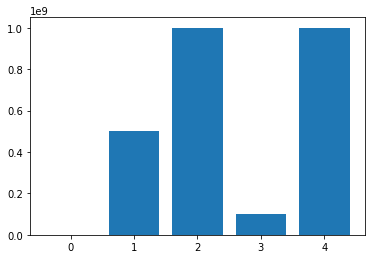

In [30]:
plt.bar(df['Content Rating NUM'], df['Installs'])

In [37]:
df.describe()

,Rating,Reviews,Installs,Price,Content Rating NUM,Category NUM
count,9133.000000,9.133000e+03,9.133000e+03,9133.000000,9133.000000,9133.000000
mean,4.176698,2.493731e+05,7.124012e+06,1.185543,1.449250,16.503887
std,0.500871,1.717315e+06,4.622321e+07,17.367113,0.992621,8.243363
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,4.100000,2.200000e+01,1.000000e+03,0.000000,1.000000,11.000000
50%,4.200000,7.420000e+02,1.000000e+05,0.000000,1.000000,14.000000
75%,4.500000,2.517200e+04,1.000000e+06,0.000000,1.000000,24.000000
max,5.000000,4.489389e+07,1.000000e+09,400.000000,4.000000,32.000000


In [0]:
df_teen = df[df['Content Rating NUM'] == 4]
df_non_teen = df[df['Content Rating NUM'] != 4]

In [42]:
df_teen.describe()

,Rating,Reviews,Installs,Price,Content Rating NUM,Category NUM
count,987.000000,9.870000e+02,9.870000e+02,987.000000,987.0,987.000000
mean,4.222817,3.439676e+05,1.241983e+07,0.659868,4.0,15.377913
std,0.385414,1.362840e+06,7.112473e+07,12.806365,0.0,6.811579
min,2.000000,0.000000e+00,0.000000e+00,0.000000,4.0,0.000000
25%,4.100000,1.060000e+02,1.000000e+04,0.000000,4.0,11.000000
50%,4.200000,9.562000e+03,5.000000e+05,0.000000,4.0,14.000000
75%,4.500000,1.070420e+05,5.000000e+06,0.000000,4.0,21.000000
max,5.000000,1.771485e+07,1.000000e+09,399.990000,4.0,32.000000


In [43]:
df_non_teen.describe()

,Rating,Reviews,Installs,Price,Content Rating NUM,Category NUM
count,8146.000000,8.146000e+03,8.146000e+03,8146.000000,8146.000000,8146.000000
mean,4.171110,2.379117e+05,6.482352e+06,1.249235,1.140192,16.640314
std,0.512836,1.755132e+06,4.218169e+07,17.840265,0.469826,8.390384
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,4.000000,2.000000e+01,1.000000e+03,0.000000,1.000000,11.000000
50%,4.200000,5.730000e+02,5.000000e+04,0.000000,1.000000,14.000000
75%,4.500000,2.029875e+04,1.000000e+06,0.000000,1.000000,24.000000
max,5.000000,4.489389e+07,1.000000e+09,400.000000,3.000000,32.000000


In [0]:
df_grouped_by_category_num = df.groupby('Category NUM')
df_grouped_by_category_num.head()

In [63]:
df[df['Category NUM'] == 0].count()

App                   61
Category              61
Rating                61
Reviews               61
Size                  61
Installs              61
Type                  61
Price                 61
Content Rating        61
Genres                61
Last Updated          61
Current Ver           61
Android Ver           61
Content Rating NUM    61
Category NUM          61
dtype: int64

In [65]:
df.loc[df['Category NUM'] == 1, 'Installs'].sum()

43770211

In [67]:
df['Category NUM'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [102]:
df_sum_installs_for_category = []
for x in df['Category NUM'].unique():
  df_sum_installs_for_category.append({'Category NUM': x, 'Sum Installs' : df.loc[df['Category NUM'] == int(x), 'Installs'].sum()})
df_sum_installs_for_category

[{'Category NUM': 0, 'Sum Installs': 99333100},
 {'Category NUM': 1, 'Sum Installs': 43770211},
 {'Category NUM': 2, 'Sum Installs': 13696950},
 {'Category NUM': 3, 'Sum Installs': 139961076},
 {'Category NUM': 4, 'Sum Installs': 536078560},
 {'Category NUM': 5, 'Sum Installs': 17586150},
 {'Category NUM': 6, 'Sum Installs': 4941943051},
 {'Category NUM': 7, 'Sum Installs': 141880807},
 {'Category NUM': 8, 'Sum Installs': 278802000},
 {'Category NUM': 9, 'Sum Installs': 950960000},
 {'Category NUM': 10, 'Sum Installs': 10672151},
 {'Category NUM': 11, 'Sum Installs': 6798732825},
 {'Category NUM': 12, 'Sum Installs': 316923484},
 {'Category NUM': 13, 'Sum Installs': 177688740},
 {'Category NUM': 14, 'Sum Installs': 29874564253},
 {'Category NUM': 15, 'Sum Installs': 868411912},
 {'Category NUM': 16, 'Sum Installs': 75112461},
 {'Category NUM': 17, 'Sum Installs': 60895910},
 {'Category NUM': 18, 'Sum Installs': 437820839},
 {'Category NUM': 19, 'Sum Installs': 175029890},
 {'Category N

In [0]:
df_sum_installs_for_category = pd.DataFrame(df_sum_installs_for_category)

In [0]:
df_sum_installs_for_category.sort_values(by=['Sum Installs'], ascending=False, inplace=True)

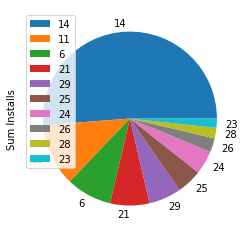

In [129]:
df_sum_installs_for_category.plot.pie(y='Sum Installs')